In [1]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [4]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
# Create a DataFrame with the scaled data
# Copy the crypto names from the original data
# Set the coinid column as index
# Display sample data


## Initialize the StandardScaler
scaler = StandardScaler()

## Fit and transform the market data (exclusing index)
market_data_scaler = scaler.fit_transform(market_data_df)

# Convert the scaled data back into a DataFrame for better readability
market_data_scaled_df = pd.DataFrame(market_data_scaler, columns=market_data_df.columns, index=market_data_df.index)

# Show the first few rows of the scaled data
market_data_scaled_df.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [6]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1,12))


# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # 2. Fit the model to the data using the scaled DataFrame
    kmeans.fit(market_data_scaled_df)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
print(elbow_df)


C:\Users\malhe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\malhe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\malhe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\malhe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

     k     inertia
0    1  287.000000
1    2  195.820218
2    3  123.190482
3    4   79.022435
4    5   65.220364
5    6   52.829819
6    7   43.786435
7    8   37.527740
8    9   33.070926
9   10   28.989073
10  11   24.532527


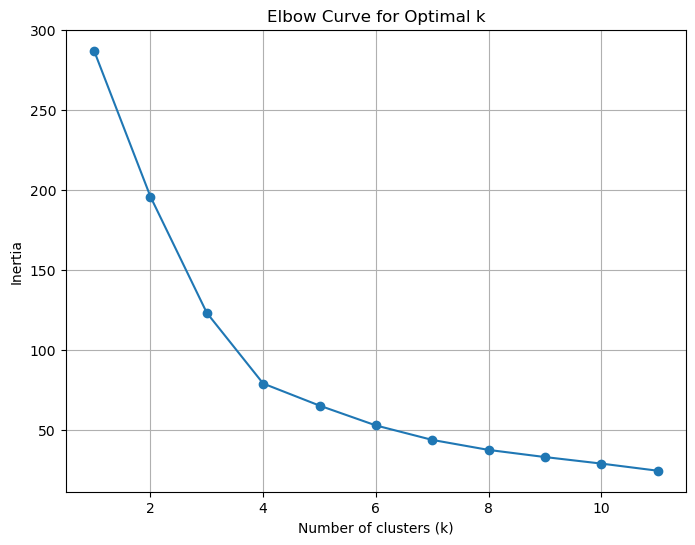

In [7]:
import matplotlib.pyplot as plt

# Plot the elbow curve
plt.figure(figsize=(8,6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o')
plt.title('Elbow Curve for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

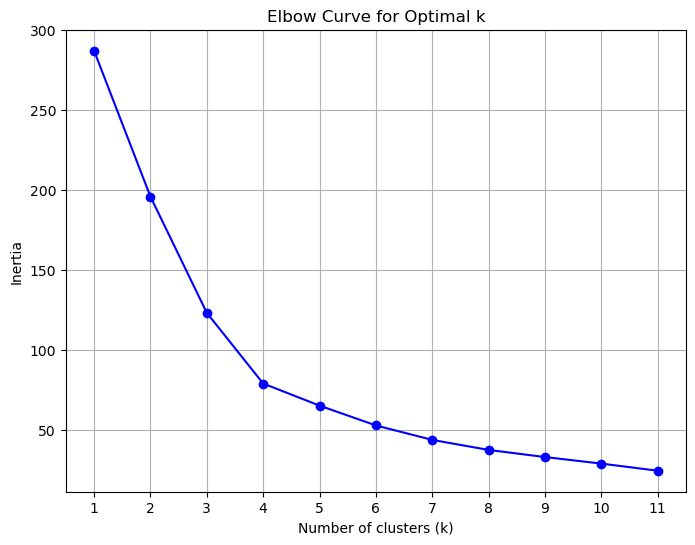

In [8]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

# Plot the elbow curve
plt.figure(figsize=(8,6))  # Adjust figure size
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o', linestyle='-', color='b')
plt.title('Elbow Curve for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(elbow_df['k'])  # Set x-axis ticks to the k values
plt.grid(True)
plt.show()



#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** Visually inspecting the elbow curve, looks like the curve bends between 4 and 5.

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [9]:
# Initialize the K-Means model using the best value for k
from sklearn.cluster import KMeans

optimal_k = 4 

kmeans_model = KMeans(n_clusters=optimal_k, random_state=42)


In [10]:
# Fit the K-Means model using the scaled data
kmeans_model.fit(market_data_scaled_df)


C:\Users\malhe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\malhe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [11]:
# Predict the clusters to group the cryptocurrencies using the scaled data
predicted_clusters = kmeans_model.predict(market_data_scaled_df)


# View the resulting array of cluster values.
print(predicted_clusters)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [12]:
# Create a copy of the DataFrame
crypto_clustered_df = market_data_scaled_df.copy()

In [13]:
# Add a new column to the DataFrame with the predicted clusters
crypto_clustered_df['Cluster'] = predicted_clusters

# Display sample data
crypto_clustered_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,crypto_cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,1
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,1
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,2
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,2
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,1


<Figure size 1000x600 with 0 Axes>

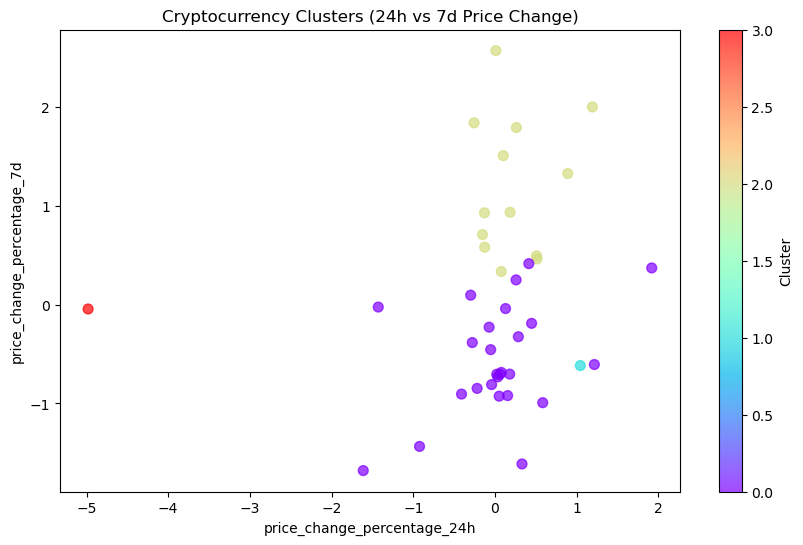

In [14]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.

import matplotlib.pyplot as plt

# Create a scatter plot to visualize the clusters
plt.figure(figsize=(10, 6))

# Plot the scatter plot using 'price_change_percentage_24h' as x and 'price_change_percentage_7d' as y
crypto_clustered_df.plot.scatter(
    x='price_change_percentage_24h', 
    y='price_change_percentage_7d', 
    c='Cluster',   # Color by clusters
    colormap='rainbow',  # Use the rainbow colormap
    figsize=(10, 6),
    title='Cryptocurrency Clusters (24h vs 7d Price Change)',
    s=50,  # Adjust point size
    alpha=0.7,  # Set transparency for better visibility
    colorbar=True
)

# Show the plot
plt.show()

### Optimize Clusters with Principal Component Analysis.

In [17]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [18]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
# pca_data_3d = pca.fit_transform(market_data_scaled_df.drop(columns=['Cluster']))
pca_data_3d = pca.fit_transform(market_data_scaled_df)

# View the first five rows of the DataFrame. 
pca_df_3d = pd.DataFrame(pca_data_3d, columns=['PC1', 'PC2', 'PC3'], index=market_data_scaled_df.index)

In [19]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
pca_df_3d.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [22]:
# Calculate the explained variance ratio for each of the 3 components
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate the total explained variance by summing the variance ratios
total_explained_variance = explained_variance_ratio.sum()

# Display the individual explained variances and the total
print(f"Explained variance by each component: {explained_variance_ratio}")
print(f"Total explained variance by the three components: {total_explained_variance:.4f}")

Explained variance by each component: [0.3719856  0.34700813 0.17603793]
Total explained variance by the three components: 0.8950


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** Total explained variance by the three components: 0.8950

In [17]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data


# Copy the crypto names from the original data


# Set the coinid column as index


# Display sample data


,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


### Find the Best Value for k Using the PCA Data

In [24]:
from sklearn.cluster import KMeans
import pandas as pd

# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1, 12))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df_3d)
    inertia.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df


C:\Users\malhe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\malhe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\malhe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\malhe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

,k,inertia
0,1,256.874086
1,2,168.811896
2,3,93.774626
3,4,49.665497
4,5,37.878747
5,6,27.618972
6,7,21.182776
7,8,17.091637
8,9,13.667065
9,10,10.559358


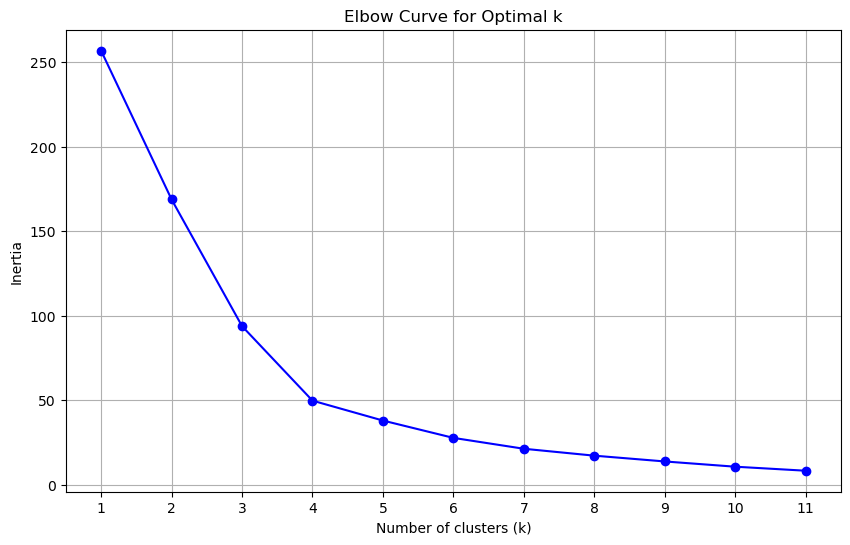

In [25]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o', linestyle='-', color='b')
plt.title('Elbow Curve for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(elbow_df['k'])  # Set x-axis ticks to the k values
plt.grid(True)
plt.show()

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** this point is around 𝑘=3 to 𝑘=5


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** The result is the same

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [26]:
# Initialize the K-Means model using the best value for k
optimal_k = 4

kmeans_model = KMeans(n_clusters=optimal_k, random_state=42)

In [27]:
# Fit the K-Means model using the PCA data
kmeans_model.fit(pca_df_3d)

C:\Users\malhe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\malhe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [28]:
# Predict the clusters to group the cryptocurrencies using the PCA data
predicted_clusters = kmeans_model.predict(pca_df_3d[['PC1', 'PC2', 'PC3']])

pca_df_3d['Cluster'] = predicted_clusters

# Print the resulting array of cluster values.
pca_df_3d.head()

,PC1,PC2,PC3,Cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,3
ethereum,-0.458261,0.458466,0.952877,3
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,3


In [29]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
import hvplot.pandas

pca_df_3d.hvplot.scatter(
    x='PC1', 
    y='PC2', 
    by='Cluster',   # Color points by the 'Cluster' column
    title="Cryptocurrency Clusters (PCA1 vs PCA2)",
    cmap='Category10',  # Set a colormap for clusters
    size=100,          # Adjust point size
    alpha=0.7          # Set transparency for better visibility
)

:NdOverlay   [Cluster]
   :Scatter   [PC1]   (PC2)

### Determine the Weights of Each Feature on each Principal Component

In [30]:
# Use the columns from the original scaled DataFrame as the index.
market_data_scaled_transposed_df = market_data_scaled_df.T

# Display the first few rows to check the result
market_data_scaled_transposed_df.head()

coin_id,bitcoin,ethereum,tether,ripple,bitcoin-cash,binancecoin,chainlink,cardano,litecoin,bitcoin-cash-sv,...,ethereum-classic,ethlend,maker,havven,omisego,celsius-degree-token,ontology,ftx-token,true-usd,digibyte
price_change_percentage_24h,0.508529,0.185446,0.021774,-0.040764,1.193036,0.891871,0.011397,0.102530,0.077497,0.448952,...,-0.071312,-4.981042,-0.125168,-1.428574,1.919812,1.045530,-0.409044,0.414711,0.078038,1.217453
price_change_percentage_7d,0.493193,0.934445,-0.706337,-0.810928,2.000959,1.327295,2.572251,1.508001,0.334297,-0.190684,...,-0.229484,-0.045178,0.580730,-0.025510,0.370447,-0.618328,-0.906963,0.414044,-0.687745,-0.607714
price_change_percentage_14d,0.772200,0.558692,-0.021680,0.249458,1.760610,0.800214,1.101647,0.648885,0.858520,-0.248043,...,-0.175544,-1.206956,-0.202356,-1.628859,-1.619761,2.907054,-1.298986,-0.047386,-0.009191,-0.907066
price_change_percentage_30d,0.235460,-0.054341,-0.061030,-0.050388,0.545842,-0.057148,-0.490495,0.328959,-0.012646,0.051634,...,0.051882,-1.212126,0.582911,-0.860354,-0.409716,5.351455,-1.393153,-0.465380,-0.058214,0.449939
price_change_percentage_60d,-0.067495,-0.273483,0.008005,-0.373164,-0.291203,0.778653,-0.931954,-0.486349,-0.366477,-0.529666,...,-0.551760,0.047736,-0.395923,-0.840714,1.696480,4.769913,-0.696937,0.128185,0.007388,-0.662530


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
    